In [1]:
import os
os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [109]:
import os
import torch
import torch.nn.functional as F
from torch import nn, optim
# from torch.autograd import Variable
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image,make_grid

import matplotlib.pyplot as plt

class Auto_Encoder(nn.Module):
    def __init__(self):
        super(Auto_Encoder, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 16)
        self.fc3 = nn.Linear(16, 2)
        self.fc4 = nn.Linear(2, 16)
        self.fc5 = nn.Linear(16, 256)
        self.fc6 = nn.Linear(256, 784)
        self.relu = nn.ReLU()

    def forward(self, x):
        res_list=[]
        x = self.relu(self.fc1(x))
        res_list.append(x)
        x = self.relu(self.fc2(x))
        res_list.append(x)
        x = self.fc3(x)
        res_list.append(x)
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = torch.tanh(self.fc6(x))
        res_list.append(x)
        return res_list

epoch: 1, loss is 0.27646806836128235
epoch: 2, loss is 0.2711537778377533
epoch: 3, loss is 0.2810738980770111
epoch: 4, loss is 0.27596160769462585
epoch: 5, loss is 0.2797084450721741
epoch: 6, loss is 0.2796263098716736
epoch: 7, loss is 0.27551424503326416
epoch: 8, loss is 0.2740989923477173
epoch: 9, loss is 0.264551043510437
epoch: 10, loss is 0.267334908246994


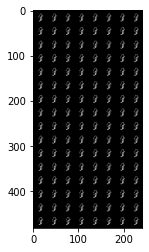

epoch: 11, loss is 0.2712658643722534
epoch: 12, loss is 0.2741803526878357
epoch: 13, loss is 0.27395591139793396
epoch: 14, loss is 0.25883781909942627
epoch: 15, loss is 0.2694403827190399
epoch: 16, loss is 0.26581883430480957
epoch: 17, loss is 0.2735878527164459
epoch: 18, loss is 0.26665541529655457
epoch: 19, loss is 0.2635669410228729
epoch: 20, loss is 0.24909482896327972


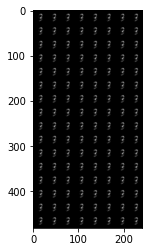

epoch: 21, loss is 0.2501051425933838
epoch: 22, loss is 0.24714310467243195
epoch: 23, loss is 0.24633435904979706
epoch: 24, loss is 0.24607455730438232
epoch: 25, loss is 0.24403439462184906
epoch: 26, loss is 0.2464580535888672
epoch: 27, loss is 0.24449600279331207
epoch: 28, loss is 0.25513705611228943
epoch: 29, loss is 0.24667701125144958
epoch: 30, loss is 0.26549032330513


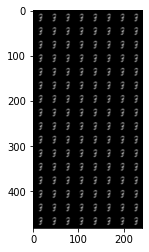

epoch: 31, loss is 0.2492295205593109
epoch: 32, loss is 0.24634774029254913
epoch: 33, loss is 0.25575485825538635
epoch: 34, loss is 0.19774891436100006
epoch: 35, loss is 0.1923421323299408
epoch: 36, loss is 0.18715141713619232
epoch: 37, loss is 0.17306239902973175
epoch: 38, loss is 0.19812653958797455
epoch: 39, loss is 0.17367962002754211
epoch: 40, loss is 0.17774862051010132


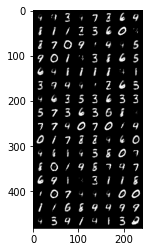

epoch: 41, loss is 0.17885558307170868
epoch: 42, loss is 0.17394766211509705
epoch: 43, loss is 0.1747991144657135
epoch: 44, loss is 0.17679566144943237
epoch: 45, loss is 0.17710603773593903
epoch: 46, loss is 0.17527644336223602
epoch: 47, loss is 0.17078234255313873
epoch: 48, loss is 0.16927340626716614
epoch: 49, loss is 0.17179401218891144
epoch: 50, loss is 0.16591624915599823


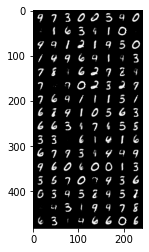

In [3]:
def get_data1(batch_size=128):
    data_tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    train_dataset = datasets.MNIST(root='./MNIST', train=True, transform=data_tf, download=True)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
    return train_loader

def to_img(x):
    x = (x + 1.) * 0.5
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


batch_size = 128
lr = 1e-2
weight_decay = 1e-5
epoches = 50

model1 = Auto_Encoder()
train_data = get_data1(batch_size)
criterion = nn.L1Loss()
optimizer = optim.Adam(model1.parameters(), lr=lr, weight_decay=weight_decay)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1.to(device)

for epoch in range(epoches):
    if epoch in [epoches * 0.25, epoches * 0.5]:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= 0.1
    for img, _ in train_data:
        img = img.view(img.size(0), -1)
        img = img.to(device)
        x_256, x_16, x_2,output = model1(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 1 == 0:
        print("epoch: {}, loss is {}".format((epoch+1), loss.data))
    if (epoch+1) % 10 == 0:
        pic = to_img(output.cpu().data)
        if not os.path.exists('./simple_autoencoder'):
            os.mkdir('./simple_autoencoder')
        save_image(pic, './simple_autoencoder/image_{}.png'.format(epoch + 1))
        img = make_grid(pic)
        img = img.numpy().transpose(1, 2, 0)
        plt.imshow(img)
        plt.show()


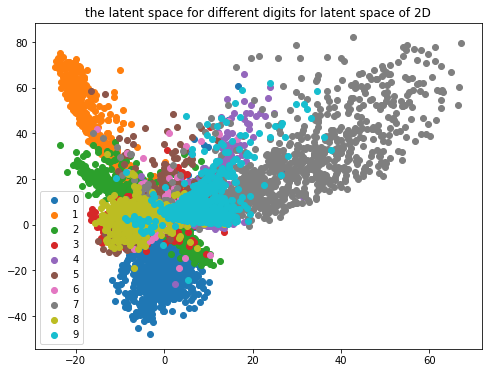

In [75]:
import numpy as np
import seaborn as sns
import pandas as pd

batch_size = 10000
train_data = get_data1(batch_size)
images, labels = next(iter(train_data))
idx_list=[]
for i in range(10):
    idx=np.where(labels==i)[0][0]
    idx_list.append(idx)
# Do a 2D plot of the latent space for different digits for latent space of 2D
img = images
img = img.view(img.size(0), -1)
img = img.to(device)
x_256, x_16, x_2,output = model1(img)
x_256, x_16, x_2,output = x_256.cpu().data.numpy(), x_16.cpu().data.numpy(), x_2.cpu().data.numpy(),output.cpu().data.numpy()

plt.figure(figsize=(8,6))
df=pd.DataFrame(x_2)
for i in range(10):
    idx=np.where(labels==i)[0]
    df1=df.iloc[idx]
    plt.scatter(df1[0],df1[1],label=i)
    
plt.legend()
plt.title('the latent space for different digits for latent space of 2D')
plt.show()

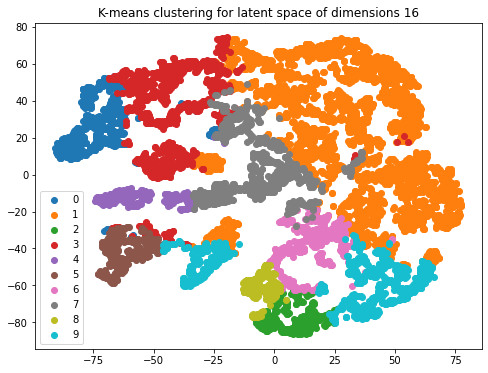

In [76]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
df=pd.DataFrame(tsne.fit_transform(x_16))
kmeans=KMeans(n_clusters=10)
y_pred_16=kmeans.fit_predict(x_16)

plt.figure(figsize=(8,6))
for i in range(10):
    idx=np.where(y_pred_16==i)[0]
    df1=df.iloc[idx]
    plt.scatter(df1[0],df1[1],label=i)
    
plt.legend()
plt.title('K-means clustering for latent space of dimensions 16')
plt.show()

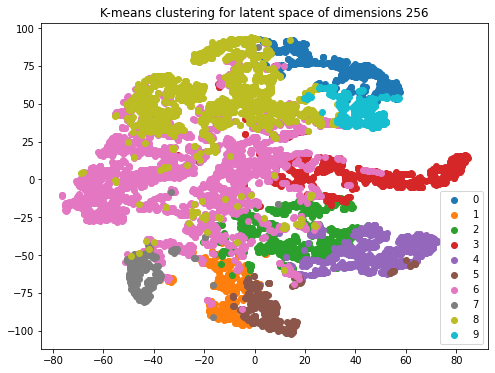

In [77]:
tsne = TSNE(n_components=2)
df=pd.DataFrame(tsne.fit_transform(x_16))
kmeans=KMeans(n_clusters=10)
y_pred_256=kmeans.fit_predict(x_256)

plt.figure(figsize=(8,6))
for i in range(10):
    idx=np.where(y_pred_256==i)[0]
    df1=df.iloc[idx]
    plt.scatter(df1[0],df1[1],label=i)
    
plt.legend()
plt.title('K-means clustering for latent space of dimensions 256')
plt.show()

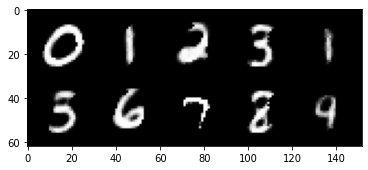

In [79]:
digital=torch.Tensor(output[idx_list])
pic = to_img(digital)

img = make_grid(pic,5)
img = img.numpy().transpose(1, 2, 0)
plt.imshow(img)
plt.show()

epoch: 1, loss is 0.27851688861846924
epoch: 2, loss is 0.28158414363861084
epoch: 3, loss is 0.2825724184513092
epoch: 4, loss is 0.290161669254303
epoch: 5, loss is 0.2819974422454834
epoch: 6, loss is 0.27626273036003113
epoch: 7, loss is 0.2759687304496765
epoch: 8, loss is 0.26813632249832153
epoch: 9, loss is 0.2607472538948059
epoch: 10, loss is 0.2658849358558655


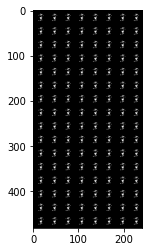

epoch: 11, loss is 0.2786092460155487
epoch: 12, loss is 0.2614538073539734
epoch: 13, loss is 0.2936863303184509
epoch: 14, loss is 0.2647208869457245
epoch: 15, loss is 0.2517930567264557
epoch: 16, loss is 0.2660568058490753
epoch: 17, loss is 0.2649897336959839
epoch: 18, loss is 0.2690943479537964
epoch: 19, loss is 0.27815309166908264
epoch: 20, loss is 0.2581872045993805


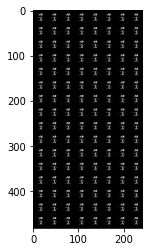

epoch: 21, loss is 0.26811298727989197
epoch: 22, loss is 0.2793366611003876
epoch: 23, loss is 0.2799290120601654
epoch: 24, loss is 0.2736537754535675
epoch: 25, loss is 0.26558569073677063
epoch: 26, loss is 0.25112488865852356
epoch: 27, loss is 0.27114540338516235
epoch: 28, loss is 0.2486746460199356
epoch: 29, loss is 0.23918212950229645
epoch: 30, loss is 0.23684720695018768


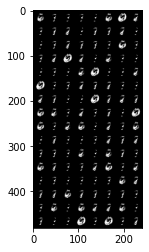

epoch: 31, loss is 0.23225684463977814
epoch: 32, loss is 0.22866302728652954
epoch: 33, loss is 0.22628352046012878
epoch: 34, loss is 0.2291998267173767
epoch: 35, loss is 0.2167038917541504
epoch: 36, loss is 0.21469135582447052
epoch: 37, loss is 0.20988355576992035
epoch: 38, loss is 0.20293040573596954
epoch: 39, loss is 0.208248108625412
epoch: 40, loss is 0.20646892488002777


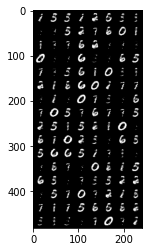

epoch: 41, loss is 0.2007000595331192
epoch: 42, loss is 0.19782474637031555
epoch: 43, loss is 0.19158445298671722
epoch: 44, loss is 0.1960534006357193
epoch: 45, loss is 0.19379106163978577
epoch: 46, loss is 0.1877453774213791
epoch: 47, loss is 0.1895798295736313
epoch: 48, loss is 0.18613752722740173
epoch: 49, loss is 0.18223050236701965
epoch: 50, loss is 0.18306782841682434


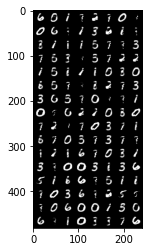

In [118]:
def get_data2(batch_size=128):
    data_tf = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root='./MNIST', train=True, transform=data_tf, download=True)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
    return train_loader

class Dis_Net(nn.Module):
    def __init__(self):
        super(Dis_Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 5, 1),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 5, 1),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.LeakyReLU(0.01),
            nn.Linear(1024, 1)
        )
        
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x
    
batch_size = 128
lr = 1e-2
weight_decay = 1e-5
epoches = 50

model2 = Auto_Encoder()
train_data = get_data2(batch_size)
criterion = nn.L1Loss()
optimizer = optim.Adam(model2.parameters(), lr=lr, weight_decay=weight_decay)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model2.to(device)
tf=transforms.GaussianBlur(3,0.1)

for epoch in range(epoches):
    if epoch in [epoches * 0.25, epoches * 0.5]:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= 0.1
    for img, _ in train_data:
        blur_img = (tf(img).view(img.size(0), -1) - 0.5) / 0.5
        img = (img.view(img.size(0), -1) - 0.5) / 0.5
        img = img.to(device)
        blur_img = blur_img.to(device)
        x_256, x_16, x_2,output = model2(blur_img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 1 == 0:
        print("epoch: {}, loss is {}".format((epoch+1), loss.data))
    if (epoch+1) % 10 == 0:
        pic = to_img(output.cpu().data)
        if not os.path.exists('./simple_autoencoder'):
            os.mkdir('./simple_autoencoder')
        save_image(pic, './simple_autoencoder/image_{}.png'.format(epoch + 1))
        img = make_grid(pic)
        img = img.numpy().transpose(1, 2, 0)
        plt.imshow(img)
        plt.show()


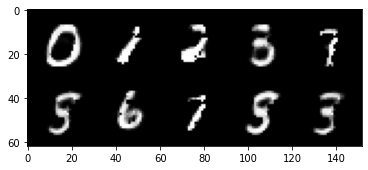

In [119]:
batch_size = 128
train_data = get_data2(batch_size)
images, labels = next(iter(train_data))
idx_list=[]
for i in range(10):
    idx=np.where(labels==i)[0][0]
    idx_list.append(idx)
    
img = images
img = (tf(img).view(img.size(0), -1) - 0.5) / 0.5
img = img.to(device)
x_256, x_16, x_2,output = model2(img)
x_256, x_16, x_2,output = x_256.cpu().data.numpy(), x_16.cpu().data.numpy(), x_2.cpu().data.numpy(),output.cpu().data.numpy()
digital=torch.Tensor(output[idx_list])
pic = to_img(digital)

img = make_grid(pic,5)
img = img.numpy().transpose(1, 2, 0)
plt.imshow(img)
plt.show()